### Defining File Path

In [40]:
import os
file_path = os.path.abspath('D:\Jupyter Notebooks\Karachi AI\Python\diabetes.csv')
print(file_path)

D:\Jupyter Notebooks\Karachi AI\Python\diabetes.csv


### Import Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### EDA 

In [42]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
print((data[data.columns] == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [44]:
print(((data[data.columns[1:8]]==0)).sum()) #Dropping Pregnancy Column

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [45]:
data[data.columns[1:8]] = data[data.columns[1:8]].replace(0, np.NaN)

In [46]:
print(data.isnull().sum()) # sum of null values present in each column

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [47]:
print(data.isnull().any()) # null values present or not in a particular column

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [48]:
null_value = data.isnull().sum() / data.shape[0] # Percentage of null values
                                                 # present
print(null_value)
null_value = null_value[null_value>0]
null_value.sort_values(inplace=True)
null_value

Pregnancies                 0.000000
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64


Glucose          0.006510
BMI              0.014323
BloodPressure    0.045573
SkinThickness    0.295573
Insulin          0.486979
dtype: float64

In [49]:
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  

In [50]:
print(null_value)

Glucose          0.006510
BMI              0.014323
BloodPressure    0.045573
SkinThickness    0.295573
Insulin          0.486979
dtype: float64


In [51]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [57]:
null_df = null_value.to_frame() # Creating a DataFrame of null values
null_df.head()

,0
Name,
Glucose,0.006510
BMI,0.014323
BloodPressure,0.045573
SkinThickness,0.295573
Insulin,0.486979


In [58]:
null_df.columns = ['Count']
null_df.head()

,Count
Name,
Glucose,0.006510
BMI,0.014323
BloodPressure,0.045573
SkinThickness,0.295573
Insulin,0.486979


In [60]:
null_df.index.names = ['Name']
null_df['Name'] = null_df.index
null_df.head()

,Count,Name
Name,,
Glucose,0.006510,Glucose
BMI,0.014323,BMI
BloodPressure,0.045573,BloodPressure
SkinThickness,0.295573,SkinThickness
Insulin,0.486979,Insulin


### Visualizing the Data

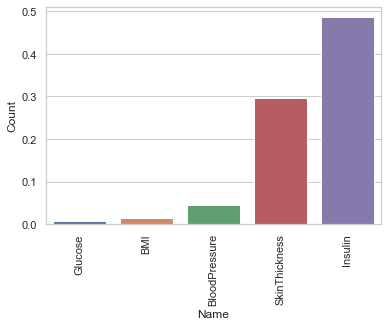

In [61]:
# Creating a barplot for Null DataFrame

sns.set(style='whitegrid', color_codes=True)
sns.barplot(x='Name', y='Count', data=null_df)
plt.xticks(rotation=90)
plt.show()

In [62]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


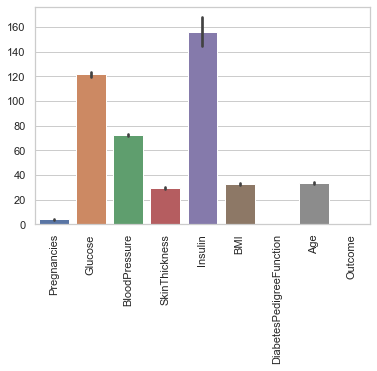

In [63]:
# Creating a barplot for data 

sns.set(style='whitegrid', color_codes=True)
sns.barplot(data=data)
plt.xticks(rotation=90)
plt.show()

In [65]:
data.fillna(data.mean(),inplace=True) # Imputing NaN values with Mean
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [66]:
print(data.isnull().any()) # NaN values have been removed

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [68]:
data.groupby('Outcome').size() 

Outcome
0    500
1    268
dtype: int64

### Building the Logistic Regression Model

Outcome column is the dependant variable (variable to be predicted), whereas 
the rest are independant variables. So first, performing Train-Test split

In [70]:
y = data['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [71]:
x = data.drop('Outcome',axis=1)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

### Training the Model 

In [75]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [78]:
predictions = logmodel.predict(X_test)

In [80]:
from sklearn import metrics

In [81]:
print(metrics.accuracy_score(y_test, predictions)) # Percentage of Current 
                                                   # Accurate Predictions 

0.7662337662337663


In [82]:
print(metrics.log_loss(y_test, predictions))

8.074068905947103


In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[128,  20],
       [ 34,  49]], dtype=int64)

<Figure size 432x288 with 0 Axes>

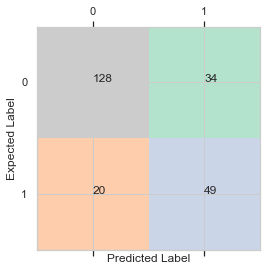

In [86]:
plt.figure()
plt.matshow(confusion_matrix, cmap='Pastel2')

for x in range(0,2):
    for y in range(0,2):
        plt.text(x,y,confusion_matrix[x,y])

plt.ylabel('Expected Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.show()

In [87]:
#in this scenario, we incorrectly predicted that they don't have diabetes 
#(FN = 20) is critical

TP = 49 #we correctly predicted that they do have diabetes
TN = 128 #we correctly predcited that they don't have diabetes
FN = 20 #we incorrectly precdicted that they don't have diabetes
FP = 34 #we incorrectly predicted that they have diabetes

In [88]:
# Out of all positives, how many are actually positive?
Recall = 49/(49+20)     #recall = TP/(TP+FN)
Recall

0.7101449275362319

In [89]:
# Out of all that are 'Predicted' Positive, how many are actually positive?
Precision = 49/(49+34)    #precision = TP/(TP+FP)
Precision

0.5903614457831325